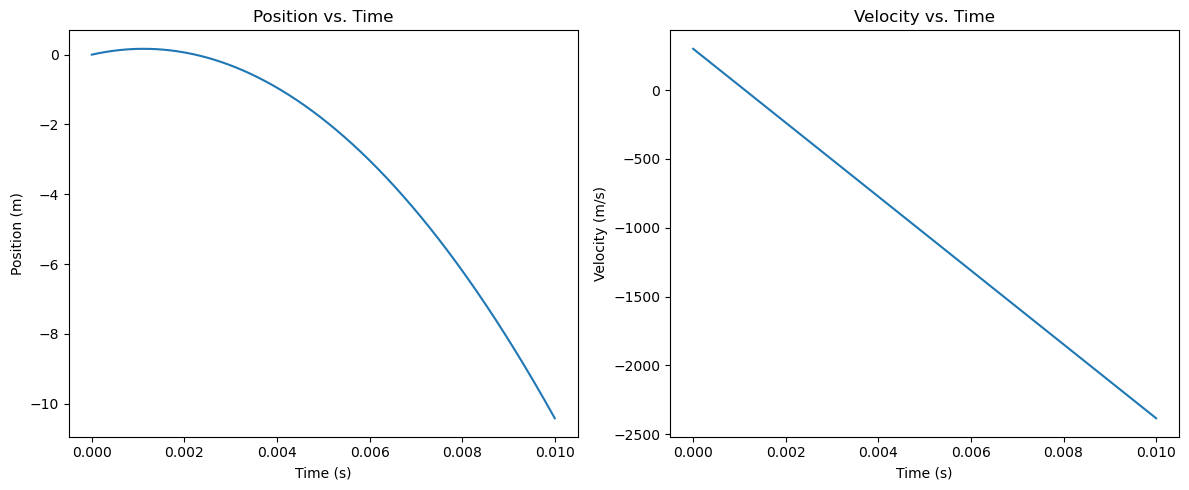

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
lambda_laser = 780e-9  # Laser wavelength in meters
k = 2 * np.pi / lambda_laser  # Wave number
hbar = 1.0545718e-34  # Reduced Planck's constant
m = 1.443e-25  # Mass of a Rubidium atom
gamma = 2 * np.pi * 6e6  # Decay rate of the excited state
Isat = 16.7  # Saturation intensity for Rubidium D2 line
P = 10e-3  # Laser power in watts
w = 1e-3  # Beam radius in meters
I0 = 2 * P / (np.pi * w**2)  # Peak intensity
s0 = 2 * I0 / Isat  # Saturation parameter
delta = -2 * np.pi * 20e6  # Negative detuning
recoil_velocity = hbar * k / m  # Recoil velocity per photon absorption/emission

# Time parameters
dt = 1e-7  # Time step in seconds
total_time = 0.01  # Total simulation time in seconds
steps = int(total_time / dt)

# Initial conditions
z = 0.0  # Initial position
v = 300.0  # Initial velocity in m/s (towards the laser)

# Arrays to store data
z_list = [z]
v_list = [v]

# Simulation
for _ in range(steps):
    # Calculate the force
    force = hbar * k * gamma * s0 / (1 + s0 + (4 * delta**2 / gamma**2))
    # Simulate spontaneous emission effect
    if np.random.random() < (gamma * dt):
        v -= recoil_velocity  # Random recoil due to spontaneous emission
        
    # Update position and velocity
    a = force / m
    v -= a * dt  # Deceleration due to opposing force
    z += v * dt
    
    # Store results
    z_list.append(z)
    v_list.append(v)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, total_time, steps + 1), z_list)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, total_time, steps + 1), v_list)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')

plt.tight_layout()
plt.show()
